## Errors in Differentiation Schemes
Here I will attempt to show that the optimal step size for forward differentiation schemes is $\sqrt(C) \approx 10^{-8}$.
If the step size is too small the rounding error will dominate, but if it is too large the truncation error will dominate.

In [1]:
from math import exp
from numpy import zeros
from pylab import plot, xscale, yscale, legend, xlabel, ylabel

In [2]:
# a sample function to test our numerical differentiation methods on.
def f(x):
    return exp(-x**2)


def forward(f, x, h):    # forward difference scheme
    return (f(x+h)-f(x))/h


def central(f, x, h):    # central difference scheme
    return (f(x+h/2.)-f(x-h/2.))/h

In [3]:
# dfdx at x = 0.5
analytic = -0.778800783

In [4]:
# initialize arrays for numerical values and errors
pows = 17
h = zeros(pows)
numerical_f = zeros(pows)
numerical_c = zeros(pows)
rel_err_f = zeros(pows)
rel_err_c = zeros(pows)

In [5]:
for i in range(pows):
    h[i] = 10.**-i
    numerical_f[i] = forward(f, .5, h[i])
    numerical_c[i] = central(f, .5, h[i])
    rel_err_f[i] = abs((analytic - numerical_f[i])/analytic)
    rel_err_c[i] = abs((analytic - numerical_c[i])/analytic)

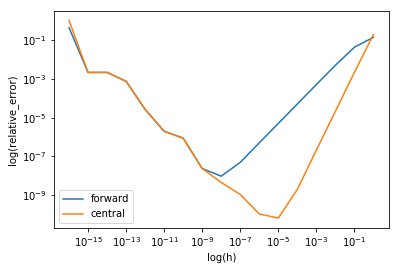

In [6]:
%matplotlib inline
plot(h, rel_err_f, h, rel_err_c)
legend(('forward', 'central'))
xlabel('log(h)')
ylabel('log(relative_error)')
xscale('log')
yscale('log')

The relative error in the forward difference scheme reaches a minimum at $h=10^{-8}$  which confirms that this is an appropriate step size in this scenario.